# Zeta Disease Classification

**Clearly This is Binary Classififcation Problem in which we have to predict Zeta Disease.**
Here I will use F1 Score, Accuracy as a metric to evaluate Model Performance.
Here we will Try various Machine Learning and Deep Learning Models.


In [1]:
#importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix
from xgboost import XGBClassifier
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()

*Reading Entire Dataset*

In [2]:
df=pd.read_csv('2021-01-21_zeta-disease_training-data_dsi-take-home-challenge.csv')

In [3]:
df.head()

age  weight   bmi  ...  cardio_stress_test  years_smoking  zeta_disease
0   54     189  27.1  ...                   0             10             0
1   23     150  38.5  ...                  55              2             0
2   47     186  29.9  ...                   0              7             0
3   18     150  30.8  ...                  56              0             0
4   24     160  32.4  ...                  59              2             0

[5 rows x 9 columns]

In [4]:
df.columns

Index(['age', 'weight', 'bmi', 'blood_pressure', 'insulin_test',
       'liver_stress_test', 'cardio_stress_test', 'years_smoking',
       'zeta_disease'],
      dtype='object')

In [5]:
df.shape

(800, 9)

In [6]:
df.columns

Index(['age', 'weight', 'bmi', 'blood_pressure', 'insulin_test',
       'liver_stress_test', 'cardio_stress_test', 'years_smoking',
       'zeta_disease'],
      dtype='object')

# Some Helper Functions

In [62]:
def plot_acc(acc,hyp,xlbl):
  plt.figure(figsize=(10,10))
  plt.plot(hyp,acc['train'],label='train_accuracy')
  plt.plot(hyp,acc['test'],label='test_accuracy')
  plt.xlabel(xlbl)
  plt.ylabel("Accuracy")
  plt.title("Accuracy Plot")
  plt.legend()
  plt.show()

# 1. Exploratory Data Analysis

**1.1 Age**

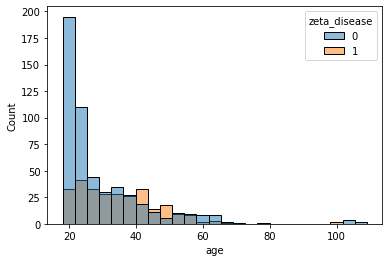

In [10]:
sns.histplot(x='age',hue='zeta_disease',data=df,)

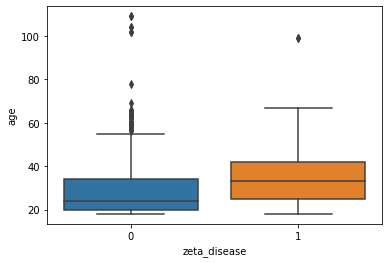

In [11]:
sns.boxplot(y='age',x='zeta_disease',data=df)
plt.show()

**OBSERVATIONS**
1. Older people have more chances of sufferenig from zeta_disease.

**1.2 Weight**

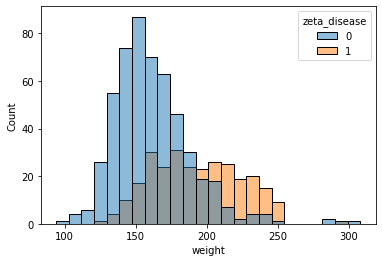

In [12]:

sns.histplot(data=df,x='weight',hue='zeta_disease')
plt.show()

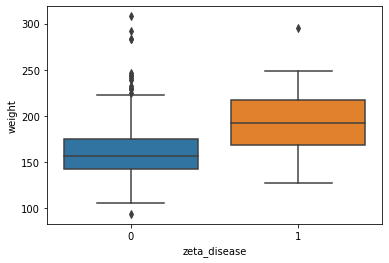

In [13]:
sns.boxplot(y='weight',x='zeta_disease',data=df)
plt.show()

In [14]:
for i in range(10,101,10):
  print(i,"th Percentile of weight=",np.percentile(df['weight'],i))

10 th Percentile of weight= 136.0
20 th Percentile of weight= 145.0
30 th Percentile of weight= 152.0
40 th Percentile of weight= 159.0
50 th Percentile of weight= 167.0
60 th Percentile of weight= 175.0
70 th Percentile of weight= 186.0
80 th Percentile of weight= 198.0
90 th Percentile of weight= 218.0
100 th Percentile of weight= 308.0


**1.3 bmi**

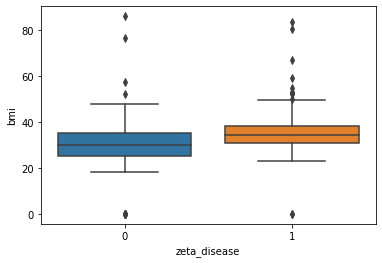

In [15]:
sns.boxplot(y='bmi',x='zeta_disease',data=df)
plt.show()

In [16]:
for i in range(10,101,10):
  print(i,"th Percentile of bmi=",np.percentile(df['bmi'],i))

10 th Percentile of bmi= 23.689999999999998
20 th Percentile of bmi= 25.9
30 th Percentile of bmi= 28.169999999999998
40 th Percentile of bmi= 30.1
50 th Percentile of bmi= 32.05
60 th Percentile of bmi= 33.7
70 th Percentile of bmi= 35.4
80 th Percentile of bmi= 37.720000000000006
90 th Percentile of bmi= 42.010000000000005
100 th Percentile of bmi= 86.1


In [17]:
for i in range(90,101,1):
  print(i,"th Percentile of bmi=",np.percentile(df['bmi'],i))

90 th Percentile of bmi= 42.010000000000005
91 th Percentile of bmi= 42.4
92 th Percentile of bmi= 42.9
93 th Percentile of bmi= 43.3
94 th Percentile of bmi= 43.62399999999998
95 th Percentile of bmi= 44.61999999999998
96 th Percentile of bmi= 45.6
97 th Percentile of bmi= 46.30599999999999
98 th Percentile of bmi= 48.80999999999999
99 th Percentile of bmi= 53.21799999999999
100 th Percentile of bmi= 86.1


**Observation**
1. About 99 percentile of data points have bmi of less than 54.

**1.4 Blood Pressure**

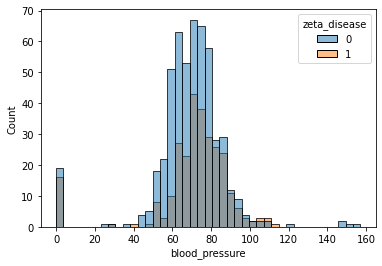

In [18]:
sns.histplot(data=df,x='blood_pressure',hue='zeta_disease')
plt.show()

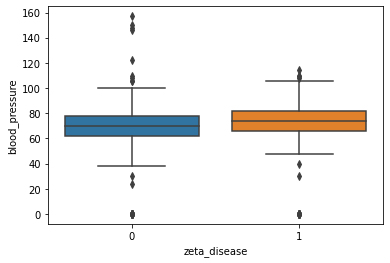

In [19]:
sns.boxplot(y='blood_pressure',x='zeta_disease',data=df)
plt.show()

In [20]:
for i in range(10,101,10):
  print(i,"th Percentile of blood_pressure=",np.percentile(df['blood_pressure'],i))

10 th Percentile of blood_pressure= 54.0
20 th Percentile of blood_pressure= 60.0
30 th Percentile of blood_pressure= 64.0
40 th Percentile of blood_pressure= 68.0
50 th Percentile of blood_pressure= 72.0
60 th Percentile of blood_pressure= 74.0
70 th Percentile of blood_pressure= 78.0
80 th Percentile of blood_pressure= 82.0
90 th Percentile of blood_pressure= 88.0
100 th Percentile of blood_pressure= 157.0


**1.5 Insulin Test**

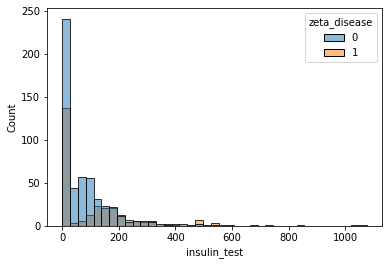

In [21]:
sns.histplot(data=df,x='insulin_test',hue='zeta_disease')
plt.show()

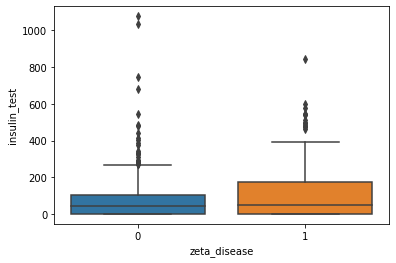

In [22]:
sns.boxplot(y='insulin_test',x='zeta_disease',data=df)
plt.show()

In [23]:
for i in range(10,101,10):
  print(i,"th Percentile of insulin_test=",np.percentile(df['insulin_test'],i))

10 th Percentile of insulin_test= 0.0
20 th Percentile of insulin_test= 0.0
30 th Percentile of insulin_test= 0.0
40 th Percentile of insulin_test= 0.0
50 th Percentile of insulin_test= 45.0
60 th Percentile of insulin_test= 78.0
70 th Percentile of insulin_test= 114.29999999999995
80 th Percentile of insulin_test= 155.0
90 th Percentile of insulin_test= 215.0
100 th Percentile of insulin_test= 1077.0


**Observation**
1. Clearly Insulin of 0 is impossible and most of our data point (40 percentile) have Insulin_test as 0.
2. So we will use imputation technique to replace these 0's.

**1.6 Liver Stress Test**

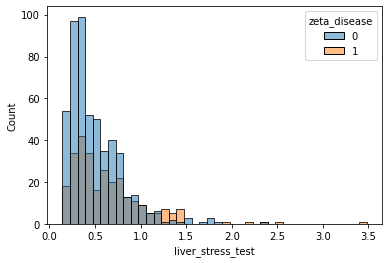

In [24]:
sns.histplot(data=df,x='liver_stress_test',hue='zeta_disease')
plt.show()

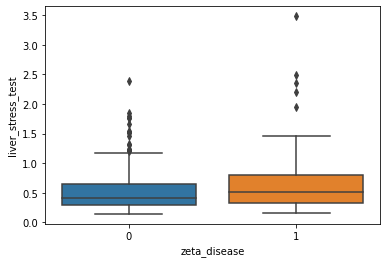

In [25]:
sns.boxplot(y='liver_stress_test',x='zeta_disease',data=df)
plt.show()

In [26]:
for i in range(10,101,10):
  print(i,"th Percentile of liver_stress_test=",np.percentile(df['liver_stress_test'],i))

10 th Percentile of liver_stress_test= 0.22970000000000002
20 th Percentile of liver_stress_test= 0.2836
30 th Percentile of liver_stress_test= 0.3228
40 th Percentile of liver_stress_test= 0.3678
50 th Percentile of liver_stress_test= 0.4453
60 th Percentile of liver_stress_test= 0.5292
70 th Percentile of liver_stress_test= 0.6451
80 th Percentile of liver_stress_test= 0.7550000000000001
90 th Percentile of liver_stress_test= 0.9549000000000001
100 th Percentile of liver_stress_test= 3.4813


In [27]:
for i in range(90,101,1):
  print(i,"th Percentile of liver_stress_test=",np.percentile(df['liver_stress_test'],i))

90 th Percentile of liver_stress_test= 0.9549000000000001
91 th Percentile of liver_stress_test= 0.9891600000000002
92 th Percentile of liver_stress_test= 1.0192800000000002
93 th Percentile of liver_stress_test= 1.0600800000000004
94 th Percentile of liver_stress_test= 1.139939999999999
95 th Percentile of liver_stress_test= 1.2072999999999996
96 th Percentile of liver_stress_test= 1.2761599999999997
97 th Percentile of liver_stress_test= 1.3555799999999993
98 th Percentile of liver_stress_test= 1.45386
99 th Percentile of liver_stress_test= 1.7621199999999997
100 th Percentile of liver_stress_test= 3.4813


**Observation**
1. About 99% of points have liver_stress_test less than 1.7.Above 1.7 we can consider as outlier.

**1.7 Cardio Stress Test**

In [28]:
for i in range(10,101,10):
  print(i,"th Percentile of cardio_stress_test=",np.percentile(df['cardio_stress_test'],i))

10 th Percentile of cardio_stress_test= 0.0
20 th Percentile of cardio_stress_test= 0.0
30 th Percentile of cardio_stress_test= 41.0
40 th Percentile of cardio_stress_test= 48.0
50 th Percentile of cardio_stress_test= 53.0
60 th Percentile of cardio_stress_test= 57.39999999999998
70 th Percentile of cardio_stress_test= 61.0
80 th Percentile of cardio_stress_test= 65.0
90 th Percentile of cardio_stress_test= 71.0
100 th Percentile of cardio_stress_test= 214.0


In [29]:
for i in range(90,101,1):
  print(i,"th Percentile of cardio_stress_test=",np.percentile(df['cardio_stress_test'],i))

90 th Percentile of cardio_stress_test= 71.0
91 th Percentile of cardio_stress_test= 71.0
92 th Percentile of cardio_stress_test= 72.0
93 th Percentile of cardio_stress_test= 72.07000000000005
94 th Percentile of cardio_stress_test= 74.0
95 th Percentile of cardio_stress_test= 75.0
96 th Percentile of cardio_stress_test= 76.0
97 th Percentile of cardio_stress_test= 78.0
98 th Percentile of cardio_stress_test= 80.0
99 th Percentile of cardio_stress_test= 90.02999999999997
100 th Percentile of cardio_stress_test= 214.0


**Observation**
1. About 99% people have cardio_stress_test less than 90.so above 90 we can treat them as outlier and ignore form our training

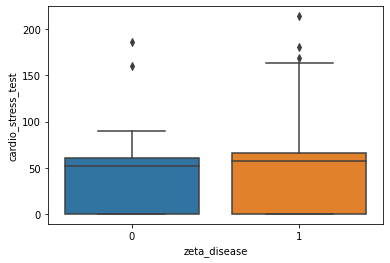

In [30]:
sns.boxplot(y='cardio_stress_test',x='zeta_disease',data=df)
plt.show()

In [31]:
for i in range(10,101,10):
  print(i,"th Percentile of years_smoking=",np.percentile(df['years_smoking'],i))

10 th Percentile of years_smoking= 0.0
20 th Percentile of years_smoking= 1.0
30 th Percentile of years_smoking= 1.0
40 th Percentile of years_smoking= 2.0
50 th Percentile of years_smoking= 3.0
60 th Percentile of years_smoking= 4.0
70 th Percentile of years_smoking= 5.0
80 th Percentile of years_smoking= 7.0
90 th Percentile of years_smoking= 9.0
100 th Percentile of years_smoking= 40.0


In [32]:
for i in range(90,101,1):
  print(i,"th Percentile of years_smoking=",np.percentile(df['years_smoking'],i))

90 th Percentile of years_smoking= 9.0
91 th Percentile of years_smoking= 9.0
92 th Percentile of years_smoking= 10.0
93 th Percentile of years_smoking= 10.0
94 th Percentile of years_smoking= 10.0
95 th Percentile of years_smoking= 11.0
96 th Percentile of years_smoking= 11.0
97 th Percentile of years_smoking= 12.0
98 th Percentile of years_smoking= 13.0
99 th Percentile of years_smoking= 14.0
100 th Percentile of years_smoking= 40.0


**Observation**
1. About 99 percentile  of points have years_smoking less than 14 yrs. More than 14 yrs we can consider as outliers.

**1.8 Years Smoking**

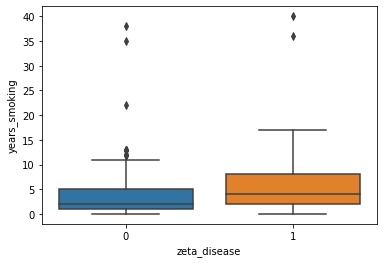

In [33]:
sns.boxplot(y='years_smoking',x='zeta_disease',data=df)
plt.show()

**TARGET VARIABLE(ZETA DISEASE)**

In [34]:
df['zeta_disease'].value_counts()

0    521
1    279
Name: zeta_disease, dtype: int64

**Clearly it is an imbalanced dataset**

<Figure size 1440x1440 with 0 Axes>

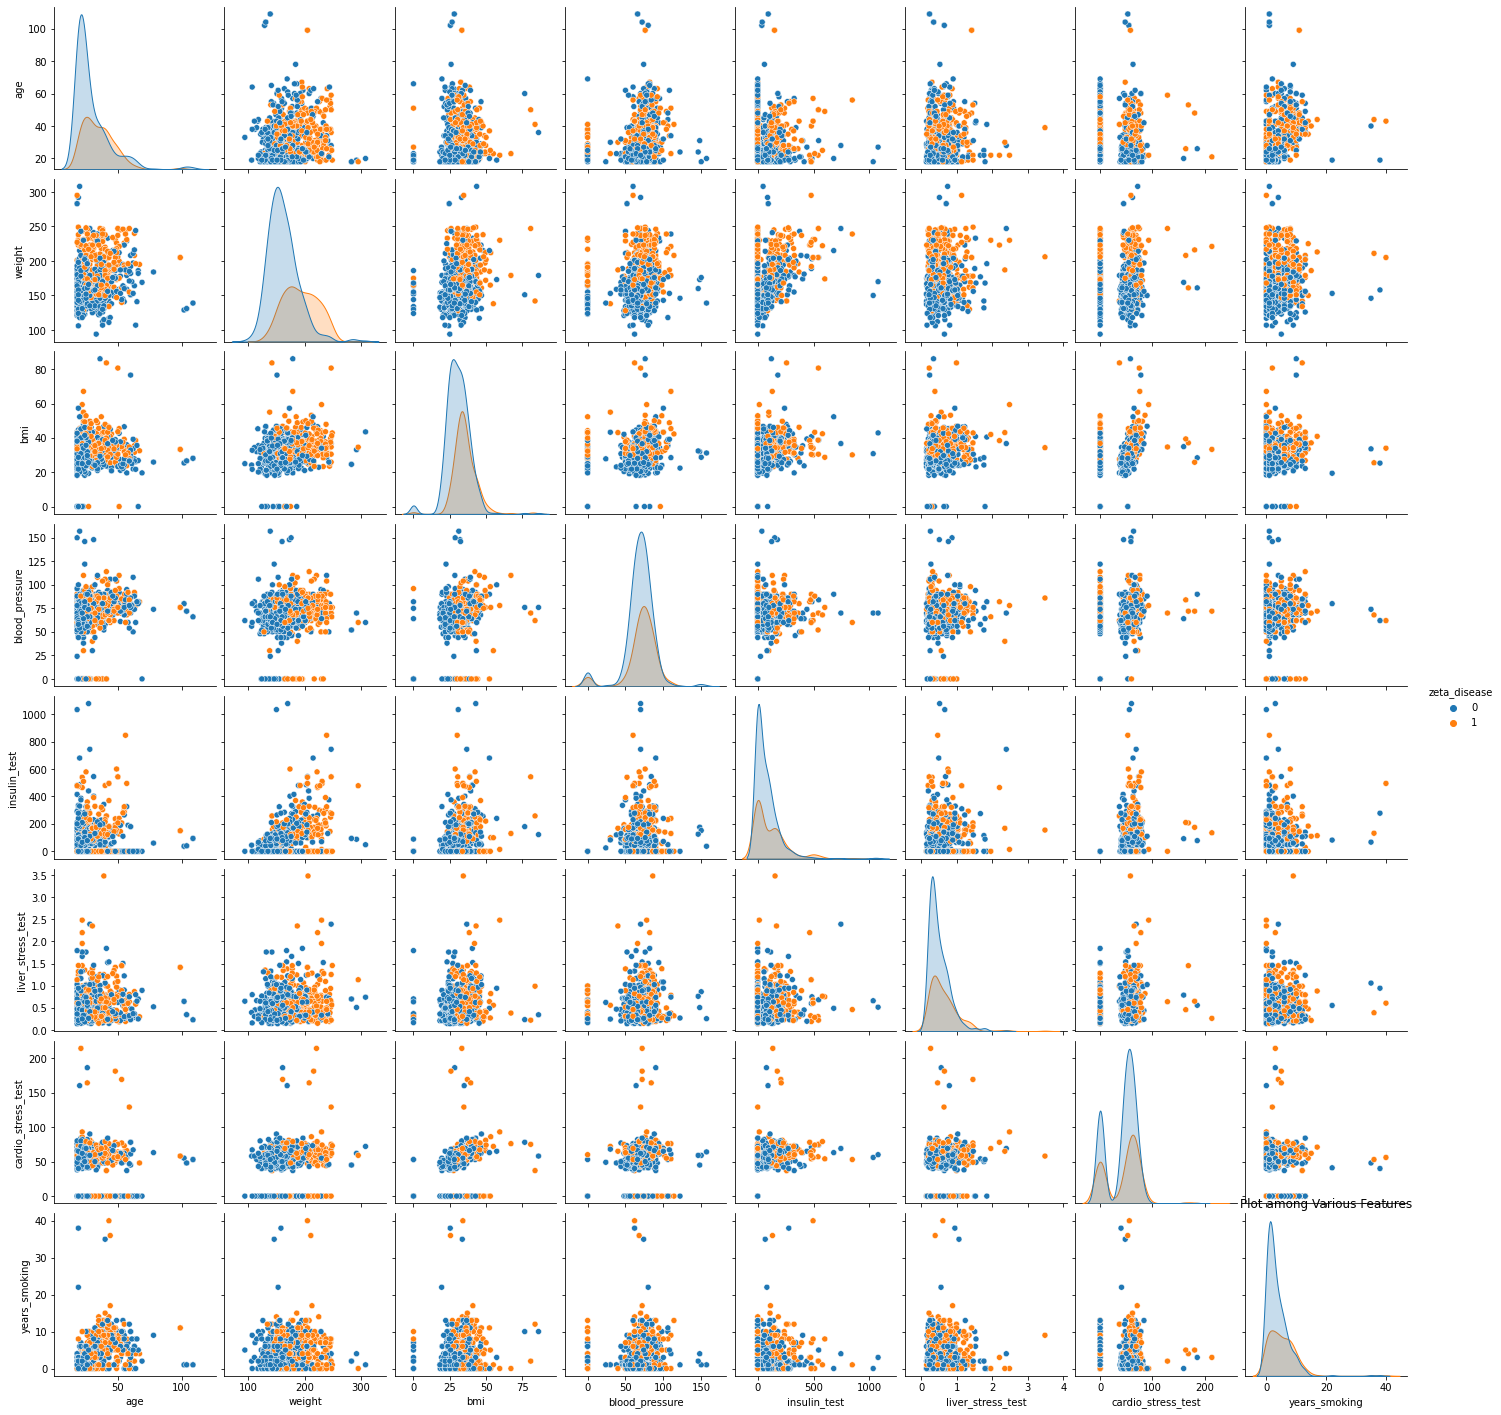

In [35]:
plt.figure(figsize=(20,20))
sns.pairplot(df,hue='zeta_disease')
plt.title("Plot among Various Features")
plt.show()

**OBSERVATION**
1. Using pairplot we see there are many outliers point that we will remove in next Section.
2. We can't get clear linear boundary by using any 2 features.

# 2. Data Cleaning

In [ ]:
# Imputing insulin_test with average insuln_test based on class label
mean_insulin_0=df[(df['insulin_test']!=0) &(df['zeta_disease']==0)]['insulin_test'].mean()
mean_insulin_1=df[(df['insulin_test']!=0) &(df['zeta_disease']==1)]['insulin_test'].mean()
df[(df['insulin_test']==0 )& (df['zeta_disease']==0)]['insulin_test']=mean_insulin_0
df[(df['insulin_test']==0) & (df['zeta_disease']==1)]['insulin_test']=mean_insulin_1

In [37]:
df=df[df['liver_stress_test']<1.8]
df=df[df['bmi']<54]
df=df[df['cardio_stress_test']<91]
df=df[df['years_smoking']<15]

In [38]:
df.shape

(772, 9)

**Observation**
1. Clearly we dropped nearly 28 data points from our training dataset.

# 3.Preparing data for Modeling

**Firstly we seperate Data into train and Validation Data**

In [39]:

X_train,X_test,y_train,y_test=train_test_split(df.drop('zeta_disease',axis=1),df['zeta_disease'],\
                                               test_size=0.2,stratify=df['zeta_disease'])

In [40]:
print("Train Data Shape=",X_train.shape)
print("Validation Data Shape=",X_test.shape)
print("Train Target Shape=",y_train.shape)
print("Test Target Shape=",y_test.shape)

Train Data Shape= (617, 8)
Validation Data Shape= (155, 8)
Train Target Shape= (617,)
Test Target Shape= (155,)


# 4. Modeling

*Firstly we are doing hyperparameter tuning for Our Models and then training them on best parameters.
And Finally we make predictions on Best Performing Model*

**4.1 Logistic Regression**

In [147]:
C=[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
accuracy={'train':[],'test':[]}
for i in C:
  clf=LogisticRegression(class_weight='balanced',C=i,max_iter=10000)
  clf.fit(X_train,y_train)
  y_train_pred=clf.predict(X_train)
  y_test_pred=clf.predict(X_test)
  train_acc=accuracy_score(y_train,y_train_pred)
  test_acc=accuracy_score(y_test,y_test_pred)
  accuracy['train'].append(train_acc)
  accuracy['test'].append(test_acc)
  print("************C=",i,"*****************")
  print("Train Accuracy=",train_acc,"Test Accuracy",test_acc)

************C= 0.0001 *****************
Train Accuracy= 0.7406807131280388 Test Accuracy 0.7612903225806451
************C= 0.001 *****************
Train Accuracy= 0.747163695299838 Test Accuracy 0.7612903225806451
************C= 0.01 *****************
Train Accuracy= 0.7520259319286872 Test Accuracy 0.7548387096774194
************C= 0.1 *****************
Train Accuracy= 0.7601296596434359 Test Accuracy 0.7806451612903226
************C= 1 *****************
Train Accuracy= 0.7601296596434359 Test Accuracy 0.7677419354838709
************C= 10 *****************
Train Accuracy= 0.7585089141004863 Test Accuracy 0.7612903225806451
************C= 100 *****************
Train Accuracy= 0.7585089141004863 Test Accuracy 0.7612903225806451
************C= 1000 *****************
Train Accuracy= 0.7585089141004863 Test Accuracy 0.7612903225806451
************C= 10000 *****************
Train Accuracy= 0.7585089141004863 Test Accuracy 0.7612903225806451


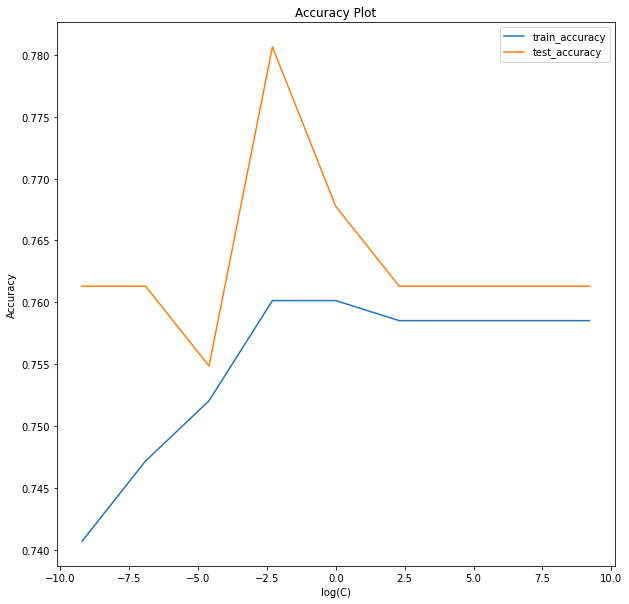

In [148]:
plot_acc(accuracy,np.log(C),"log(C)")

*Clearly C=0.1 gives best Result, So we train model with these value* 

In [149]:
log_reg=LogisticRegression(class_weight='balanced',C=0.1,max_iter=10000)
log_reg.fit(X_train,y_train)
y_train_pred=log_reg.predict(X_train)
y_test_pred=log_reg.predict(X_test)

In [150]:
print("Train Acccuracy=",accuracy_score(y_train,y_train_pred),"Test Accuracy=",accuracy_score(y_test,y_test_pred))
print("Train F1 Score=",f1_score(y_train,y_train_pred),"Test F1 Socre=",f1_score(y_test,y_test_pred))

Train Acccuracy= 0.7601296596434359 Test Accuracy= 0.7806451612903226
Train F1 Score= 0.6696428571428571 Test F1 Socre= 0.7118644067796609


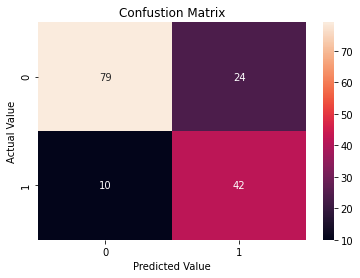

In [154]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title("Confustion Matrix")
plt.show()

**4.2 Support Vector Classifier**

In [155]:
C=[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
accuracy={'train':[],'test':[]}
for i in C:
  clf=SVC(class_weight='balanced',C=i)
  clf.fit(X_train,y_train)
  y_train_pred=clf.predict(X_train)
  y_test_pred=clf.predict(X_test)
  train_acc=accuracy_score(y_train,y_train_pred)
  test_acc=accuracy_score(y_test,y_test_pred)
  accuracy['train'].append(train_acc)
  accuracy['test'].append(test_acc)
  print("************C=",i,"*****************")
  print("Train Accuracy=",train_acc,"Test Accuracy",test_acc)

************C= 0.0001 *****************
Train Accuracy= 0.6612641815235009 Test Accuracy 0.6645161290322581
************C= 0.001 *****************
Train Accuracy= 0.3387358184764992 Test Accuracy 0.33548387096774196
************C= 0.01 *****************
Train Accuracy= 0.6612641815235009 Test Accuracy 0.6645161290322581
************C= 0.1 *****************
Train Accuracy= 0.7163695299837926 Test Accuracy 0.7354838709677419
************C= 1 *****************
Train Accuracy= 0.7374392220421394 Test Accuracy 0.7677419354838709
************C= 10 *****************
Train Accuracy= 0.7649918962722853 Test Accuracy 0.7677419354838709
************C= 100 *****************
Train Accuracy= 0.7844408427876823 Test Accuracy 0.7548387096774194
************C= 1000 *****************
Train Accuracy= 0.8168557536466775 Test Accuracy 0.7290322580645161
************C= 10000 *****************
Train Accuracy= 0.839546191247974 Test Accuracy 0.7677419354838709


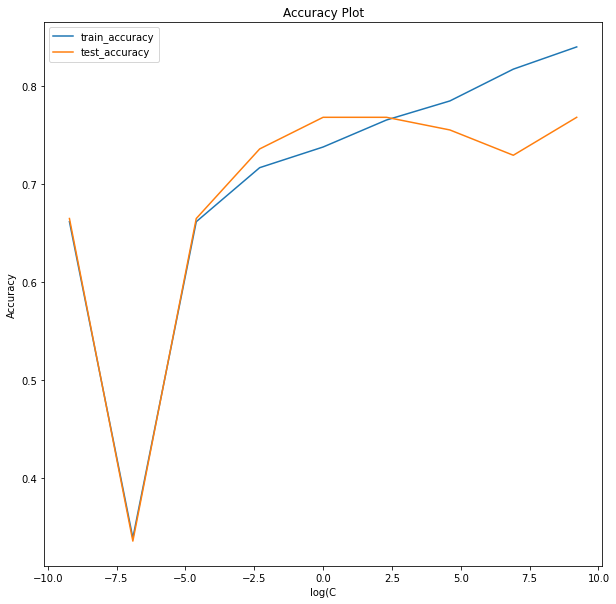

In [156]:
plot_acc(accuracy,np.log(C),"log(C")

*Clearly C=10 gives best result*

In [157]:
svm=SVC(class_weight='balanced',C=10)
svm.fit(X_train,y_train)
y_train_pred=svm.predict(X_train)
y_test_pred=svm.predict(X_test)

In [158]:
print("Train Acccuracy=",accuracy_score(y_train,y_train_pred),"Test Accuracy=",accuracy_score(y_test,y_test_pred))
print("Train F1 Score=",f1_score(y_train,y_train_pred),"Test F1 Socre=",f1_score(y_test,y_test_pred))

Train Acccuracy= 0.7649918962722853 Test Accuracy= 0.7677419354838709
Train F1 Score= 0.6827133479212254 Test F1 Socre= 0.6785714285714285


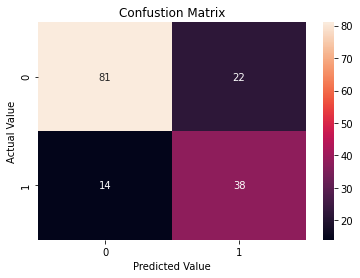

In [159]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title("Confustion Matrix")
plt.show()

**4.3 Naive Bayes Classifier**

In [160]:
C=[10**-5,0.0001,0.001,0.01,0.1,1,10,100]
accuracy={'train':[],'test':[]}
for i in C:
  clf=GaussianNB(priors=[0.4,0.6],var_smoothing=i)
  clf.fit(X_train,y_train)
  y_train_pred=clf.predict(X_train)
  y_test_pred=clf.predict(X_test)
  train_acc=accuracy_score(y_train,y_train_pred)
  test_acc=accuracy_score(y_test,y_test_pred)
  accuracy['train'].append(train_acc)
  accuracy['test'].append(test_acc)
  print("************C=",i,"*****************")
  print("Train Accuracy=",train_acc,"Test Accuracy",test_acc)

************C= 1e-05 *****************
Train Accuracy= 0.7277147487844409 Test Accuracy 0.7483870967741936
************C= 0.0001 *****************
Train Accuracy= 0.7212317666126418 Test Accuracy 0.7354838709677419
************C= 0.001 *****************
Train Accuracy= 0.7293354943273906 Test Accuracy 0.7419354838709677
************C= 0.01 *****************
Train Accuracy= 0.713128038897893 Test Accuracy 0.7290322580645161
************C= 0.1 *****************
Train Accuracy= 0.6726094003241491 Test Accuracy 0.7225806451612903
************C= 1 *****************
Train Accuracy= 0.3387358184764992 Test Accuracy 0.33548387096774196
************C= 10 *****************
Train Accuracy= 0.3387358184764992 Test Accuracy 0.33548387096774196
************C= 100 *****************
Train Accuracy= 0.3387358184764992 Test Accuracy 0.33548387096774196


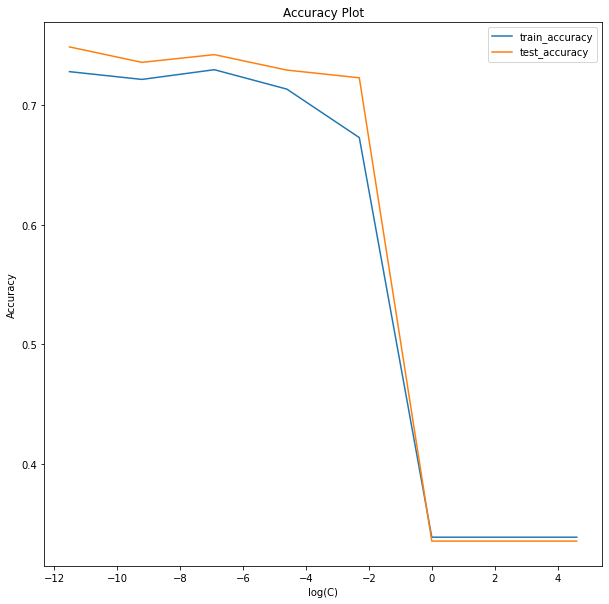

In [161]:
plot_acc(accuracy,np.log(C),"log(C)")

*Clearly C=10**-5 gives good result*

In [162]:
nb=GaussianNB(priors=[0.4,0.6],var_smoothing=10**-5)
nb.fit(X_train,y_train)
y_train_pred=nb.predict(X_train)
y_test_pred=nb.predict(X_test)

In [163]:
print("Train Acccuracy=",accuracy_score(y_train,y_train_pred),"Test Accuracy=",accuracy_score(y_test,y_test_pred))
print("Train F1 Score=",f1_score(y_train,y_train_pred),"Test F1 Socre=",f1_score(y_test,y_test_pred))

Train Acccuracy= 0.7277147487844409 Test Accuracy= 0.7483870967741936
Train F1 Score= 0.6528925619834711 Test F1 Socre= 0.6666666666666665


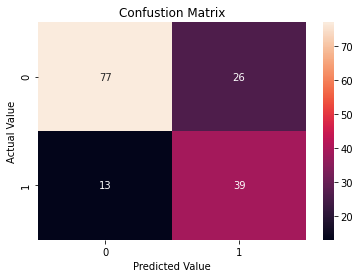

In [164]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title("Confustion Matrix")
plt.show()

**4.4 Random Forest Classifier**

In [165]:
num_estimators=[10,20,50,100,500,1000]
max_depth=[10,20,50,100,500]
accuracy={"train":[],"test":[]}
for est in num_estimators:
  for depth in max_depth:
    clf=RandomForestClassifier(n_estimators=est,max_depth=depth,class_weight='balanced')
    clf.fit(X_train,y_train)
    y_train_pred=clf.predict(X_train)
    y_test_pred=clf.predict(X_test)
    train_acc=accuracy_score(y_train,y_train_pred)
    test_acc=accuracy_score(y_test,y_test_pred)
    accuracy['train'].append(train_acc)
    accuracy['test'].append(test_acc)
    print("************Depth=",depth, "Num of Estimators= ",est,"*****************")
    print("Train Accuracy=",train_acc,"Test Accuracy",test_acc)

************Depth= 10 Num of Estimators=  10 *****************
Train Accuracy= 0.9805510534846029 Test Accuracy 0.7741935483870968
************Depth= 20 Num of Estimators=  10 *****************
Train Accuracy= 0.9756888168557536 Test Accuracy 0.7741935483870968
************Depth= 50 Num of Estimators=  10 *****************
Train Accuracy= 0.9870340356564019 Test Accuracy 0.7612903225806451
************Depth= 100 Num of Estimators=  10 *****************
Train Accuracy= 0.9854132901134521 Test Accuracy 0.7354838709677419
************Depth= 500 Num of Estimators=  10 *****************
Train Accuracy= 0.9886547811993517 Test Accuracy 0.7483870967741936
************Depth= 10 Num of Estimators=  20 *****************
Train Accuracy= 0.993517017828201 Test Accuracy 0.8
************Depth= 20 Num of Estimators=  20 *****************
Train Accuracy= 0.993517017828201 Test Accuracy 0.7483870967741936
************Depth= 50 Num of Estimators=  20 *****************
Train Accuracy= 0.9967585089141004 

**This Model Gives Highly Overfitting Results for every value. So we will try with depth=500 and estimators=1000**

In [166]:
rf=RandomForestClassifier(n_estimators=1000,max_depth=500,class_weight='balanced')
rf.fit(X_train,y_train)
y_train_pred=rf.predict(X_train)
y_test_pred=rf.predict(X_test)

In [167]:
print("Train Acccuracy=",accuracy_score(y_train,y_train_pred),"Test Accuracy=",accuracy_score(y_test,y_test_pred))
print("Train F1 Score=",f1_score(y_train,y_train_pred),"Test F1 Socre=",f1_score(y_test,y_test_pred))

Train Acccuracy= 1.0 Test Accuracy= 0.7677419354838709
Train F1 Score= 1.0 Test F1 Socre= 0.5909090909090908


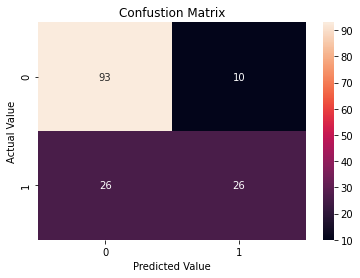

In [168]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title("Confustion Matrix")
plt.show()

**4.5 XgBoost Classifier**

In [169]:
num_estimators=[10,20,50,100,500,1000]
max_depth=[1,2,5,10,50]
accuracy={"train":[],"test":[]}
for est in num_estimators:
  for depth in max_depth:
    clf=XGBClassifier(n_estimators=est,max_depth=depth,class_weight='balanced')
    clf.fit(X_train,y_train)
    y_train_pred=clf.predict(X_train)
    y_test_pred=clf.predict(X_test)
    train_acc=accuracy_score(y_train,y_train_pred)
    test_acc=accuracy_score(y_test,y_test_pred)
    accuracy['train'].append(train_acc)
    accuracy['test'].append(test_acc)
    print("************Depth=",depth, "Num of Estimators= ",est,"*****************")
    print("Train Accuracy=",train_acc,"Test Accuracy",test_acc)

************Depth= 1 Num of Estimators=  10 *****************
Train Accuracy= 0.7617504051863857 Test Accuracy 0.7677419354838709
************Depth= 2 Num of Estimators=  10 *****************
Train Accuracy= 0.7811993517017828 Test Accuracy 0.7677419354838709
************Depth= 5 Num of Estimators=  10 *****************
Train Accuracy= 0.8816855753646677 Test Accuracy 0.8193548387096774
************Depth= 10 Num of Estimators=  10 *****************
Train Accuracy= 0.940032414910859 Test Accuracy 0.7677419354838709
************Depth= 50 Num of Estimators=  10 *****************
Train Accuracy= 0.9416531604538088 Test Accuracy 0.7612903225806451
************Depth= 1 Num of Estimators=  20 *****************
Train Accuracy= 0.7682333873581848 Test Accuracy 0.7741935483870968
************Depth= 2 Num of Estimators=  20 *****************
Train Accuracy= 0.7909238249594813 Test Accuracy 0.7741935483870968
************Depth= 5 Num of Estimators=  20 *****************
Train Accuracy= 0.910858995

*Depth=1 and estimators=100*

In [170]:
xgb=XGBClassifier(n_estimators=100,max_depth=1,class_weight='balanced')
xgb.fit(X_train,y_train)
y_train_pred=xgb.predict(X_train)
y_test_pred=xgb.predict(X_test)

In [171]:
print("Train Acccuracy=",accuracy_score(y_train,y_train_pred),"Test Accuracy=",accuracy_score(y_test,y_test_pred))
print("Train F1 Score=",f1_score(y_train,y_train_pred),"Test F1 Socre=",f1_score(y_test,y_test_pred))

Train Acccuracy= 0.7957860615883307 Test Accuracy= 0.7741935483870968
Train F1 Score= 0.6538461538461537 Test F1 Socre= 0.5977011494252874


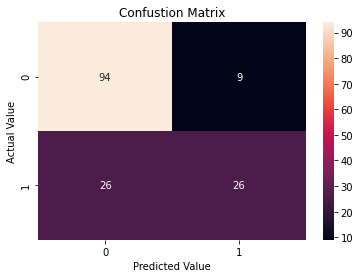

In [172]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title("Confustion Matrix")
plt.show()

**4.6 Deep Learning Model**

In [173]:
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Input(shape=(8)),
                                  tf.keras.layers.Dense(64,activation='relu'),
                                  tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001,amsgrad=True),loss='binary_crossentropy',metrics=['accuracy'])

In [174]:
log=model.fit(X_train,y_train,batch_size=4,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
155/155 [==============================] - 1s 3ms/step - loss: 16.0438 - accuracy: 0.6729 - val_loss: 6.8744 - val_accuracy: 0.6645
Epoch 2/100
155/155 [==============================] - 0s 1ms/step - loss: 5.4533 - accuracy: 0.6536 - val_loss: 1.8530 - val_accuracy: 0.6645
Epoch 3/100
155/155 [==============================] - 0s 1ms/step - loss: 1.7791 - accuracy: 0.6046 - val_loss: 0.9941 - val_accuracy: 0.6387
Epoch 4/100
155/155 [==============================] - 0s 1ms/step - loss: 0.9503 - accuracy: 0.6083 - val_loss: 0.9251 - val_accuracy: 0.6516
Epoch 5/100
155/155 [==============================] - 0s 1ms/step - loss: 0.8688 - accuracy: 0.6108 - val_loss: 0.9478 - val_accuracy: 0.6452
Epoch 6/100
155/155 [==============================] - 0s 1ms/step - loss: 0.8781 - accuracy: 0.6239 - val_loss: 0.8023 - val_accuracy: 0.6258
Epoch 7/100
155/155 [==============================] - 0s 1ms/step - loss: 0.7540 - accuracy: 0.6280 - val_loss: 0.7647 - val_accuracy: 0.638

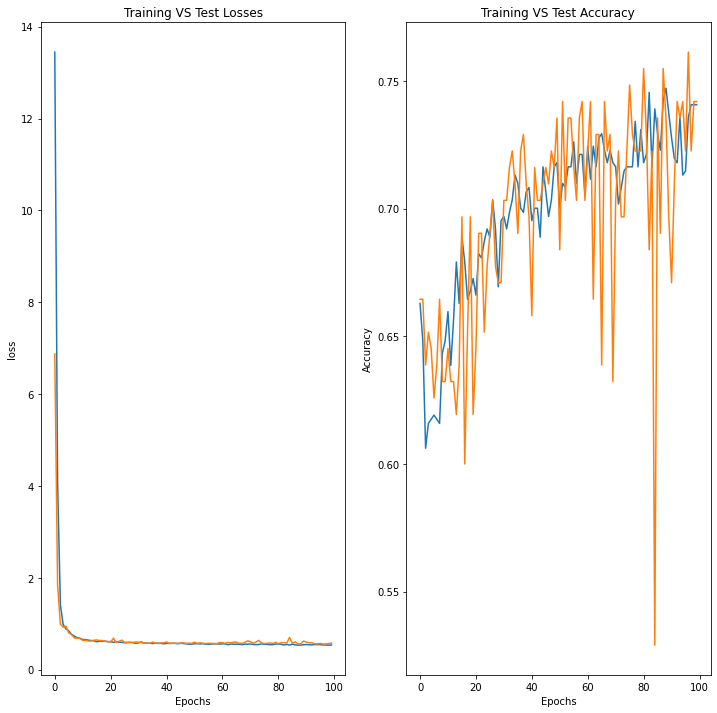

In [175]:
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.plot(log.history['loss'],label='Train Loss')
plt.plot(log.history['val_loss'],label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Training VS Test Losses')
plt.subplot(122)
plt.plot(log.history['accuracy'],label='Train Accuracy')
plt.plot(log.history['val_accuracy'],label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training VS Test Accuracy')
plt.show()

In [184]:
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)
for i in range(len(y_train_pred)):
  if y_train_pred[i]>0.5:
    y_train_pred[i]=1
  else:
    y_train_pred[i]=0 

for i in range(len(y_test_pred)):
  if y_test_pred[i]>0.5:
    y_test_pred[i]=1
  else:
    y_test_pred[i]=0     


In [185]:
print("Train Acccuracy=",accuracy_score(y_train,y_train_pred),"Test Accuracy=",accuracy_score(y_test,y_test_pred))
print("Train F1 Score=",f1_score(y_train,y_train_pred),"Test F1 Socre=",f1_score(y_test,y_test_pred))

Train Acccuracy= 0.7536466774716369 Test Accuracy= 0.7419354838709677
Train F1 Score= 0.5421686746987953 Test F1 Socre= 0.5121951219512195


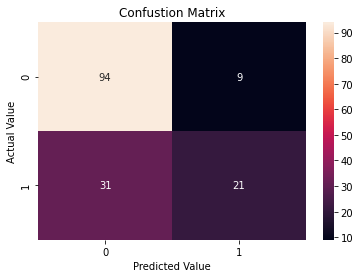

In [186]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title("Confustion Matrix")
plt.show()

**MODEL COMPARISONS**

In [187]:
models=['Logistic Regression','SVC','Naive Bayes','Random Forest','XGBOOST','Deep Learning Model']
train_f1=[0.6696428571428571,0.6827133479212254,0.6528925619834711,1.0,0.6538461538461537,0.5421686746987953]
val_f1=[0.7118644067796609,0.6785714285714285,0.6666666666666665,0.5909090909090908,0.5977011494252874,0.5121951219512195]
df=pd.DataFrame({'models':models,'train_f1_score':train_f1,'validation_f1_score':val_f1})
df

models  train_f1_score  validation_f1_score
0  Logistic Regression        0.669643             0.711864
1                  SVC        0.682713             0.678571
2          Naive Bayes        0.652893             0.666667
3        Random Forest        1.000000             0.590909
4              XGBOOST        0.653846             0.597701
5  Deep Learning Model        0.542169             0.512195

In [188]:
#Clearly Logistic Regression Gives best result so we will do prediction using Logistic regression

In [193]:
pred=pd.read_csv('2021-01-21_zeta-disease_prediction-data_dsi-take-home-challenge.csv')
pred['zeta_disease']=log_reg.predict(pred.drop('zeta_disease',axis=1))
pred.head()

age  weight   bmi  ...  cardio_stress_test  years_smoking  zeta_disease
0   24     151  39.5  ...                  56              4             1
1   27     179  35.5  ...                  43              6             1
2   34     147  26.9  ...                  53              2             0
3   35     206  32.4  ...                  61              6             1
4   60     193  29.8  ...                  65              9             1

[5 rows x 9 columns]

In [194]:
pred.to_csv('pred.csv')

In [195]:
#Clearly our reults are not so good because we have less data.